# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** Luca Fetz & Mohammed-Ismail Ben Salah 
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

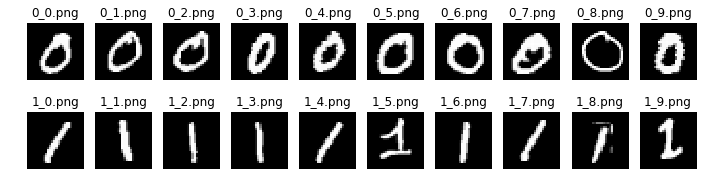

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion
In this implementation of fourier descriptors we first binarized the image, then extracted the contours of our numbers and resampled them so that they are all of the same length. We then converted the coordinates of the contours to complex number and applied a fft to produce our fourier descriptors. We then plotted the result to see how well our descriptors differentiate the different numbers. We avoided using f0 to be invariant to translation. We used the magnitude and not the phase so that we are invariant to rotation. Here every image is at the same scale, so it wasn't considered necessary to be invariant to scaling. To have a representation invariant to scaling we could use the ratio between 2 fourier descriptors. 

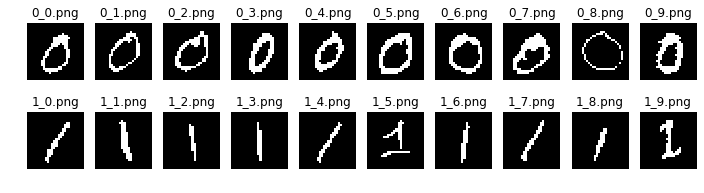

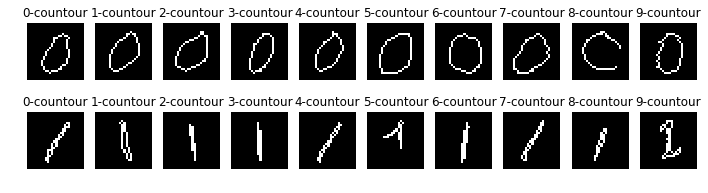

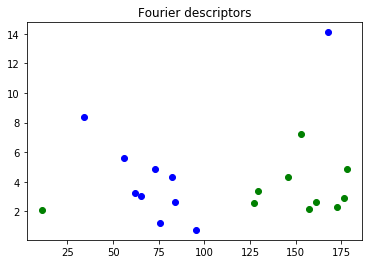

In [62]:
# u_k = x_k + j y_k
from scipy.fftpack import fft, ifft

import numpy as np
import skimage.measure as mes
from scipy.signal import resample

#extract number of images and number of pixels
N_images, N,tmp = zeros_im.shape


#binarize images
thres = 230
zeros_im_bin = zeros_im.copy()
for i in range(0,N_images):
    for j in range(0,N):
        for k in range(0,N):
            if zeros_im_bin[i][j,k] > thres:
                zeros_im_bin[i][j,k] = 255
            else:
                zeros_im_bin[i][j,k] = 0
                
ones_im_bin = ones_im.copy()
for i in range(0,N_images):
    for j in range(0,N):
        for k in range(0,N):
            if ones_im_bin[i][j,k] > thres:
                ones_im_bin[i][j,k] = 255
            else:
                ones_im_bin[i][j,k] = 0

#visualize binarization
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im_bin, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im_bin, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

#contour_zeros will be a list of lists of ndarrays with the coordinates of the contour
#access it with contour_zeros[im_idx,arra_idx,]
contour_zeros = []
contour_ones = []
for i in range(0,N_images):
    contour_zeros.append(mes.find_contours(zeros_im_bin[i], 128, fully_connected='high', positive_orientation='low'))
    contour_ones.append(mes.find_contours(ones_im_bin[i], 128, fully_connected='high', positive_orientation='low'))
    

#visualize contour
zeros_contour_im = np.zeros((N_images,N,N))
ones_contour_im = np.zeros((N_images,N,N))
for j in range(0,N_images):
    for i in range(0,len(contour_zeros[j][0])):
        zeros_contour_im[j,int(round(contour_zeros[j][0][i,0])),int(round(contour_zeros[j][0][i,1]))] = 255
    for i in range(0,len(contour_ones[j][0])):
        ones_contour_im[j,int(round(contour_ones[j][0][i,0])),int(round(contour_ones[j][0][i,1]))] = 255

fig, ax = plt.subplots(2,N_images, figsize=(12, 3))
for idx in range(0,N_images):
        ax[0,idx].imshow(zeros_contour_im[idx], cmap='gray')
        ax[0,idx].axis('off')
        ax[0,idx].set_title('{}-countour'.format(idx))
        ax[1,idx].imshow(ones_contour_im[idx], cmap='gray')
        ax[1,idx].axis('off')
        ax[1,idx].set_title('{}-countour'.format(idx))
plt.show()

#take the smallest contour and downsample the others with scipy.signal.resample
min_length = len(contour_zeros[0][0])
for i in range(0,N_images):
    if (len(contour_zeros[i][0]) < min_length):
        min_length = len(contour_zeros[i][0])
    if (len(contour_ones[i][0]) < min_length):
        min_length = len(contour_ones[i][0])
        
contour_zeros_normalized = []
contour_ones_normalized = []
for i in range(0,N_images):
    contour_zeros_normalized.append(resample(contour_zeros[i][0],min_length))
    contour_ones_normalized.append(resample(contour_ones[i][0],min_length))
    
#convert x, y to cplx x +j*y
contour_zeros_normalized_cplx = []
contour_ones_normalized_cplx = []
for i in range(0,N_images):
    contour_zeros_normalized_cplx.append(np.sum(contour_zeros_normalized[i] * [1,1j], axis=1))
    contour_ones_normalized_cplx.append(np.sum(contour_ones_normalized[i] * [1,1j], axis=1))
    
# take fft 
fourier_descriptors_zeros = []
fourier_descriptors_ones = []

for i in range(0,N_images):
    fourier_descriptors_zeros.append(fft(contour_zeros_normalized_cplx[i]))
    fourier_descriptors_ones.append(fft(contour_ones_normalized_cplx[i]))

#plot ffts
for i in range(0,N_images):
    plt.plot(abs(fourier_descriptors_zeros[i][1]),abs(fourier_descriptors_zeros[i][5]),'bo',abs(fourier_descriptors_ones[i][1]),abs(fourier_descriptors_ones[i][5]),'go')
    
    #plt.plot(abs(fourier_descriptors_zeros[i][1])/abs(fourier_descriptors_zeros[i][3]),abs(fourier_descriptors_zeros[i][2])/abs(fourier_descriptors_zeros[i][4]),'bo',abs(fourier_descriptors_ones[i][1])/abs(fourier_descriptors_ones[i][3]),abs(fourier_descriptors_ones[i][2])/abs(fourier_descriptors_ones[i][4]),'go')
plt.title('Fourier descriptors')
plt.show()

In [66]:
nb_contour = np.zeros((N_images,N_images),np.uint)
print(len(contour_zeros[1][0]))
print(contour_zeros_normalized[1][3])
print(contour_zeros_normalized_cplx[1][3])

71
[22.84090442  8.39306839]
(22.840904420848187+8.393068386201408j)


### 1.3 Additional method(s)
Add your implementation and discussion

#### 1.3.1 Region based descriptors

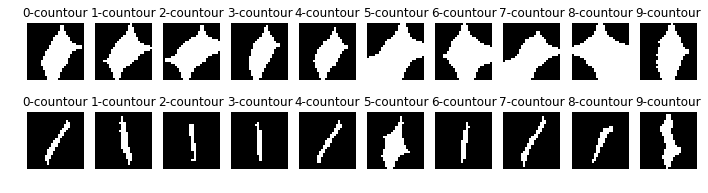

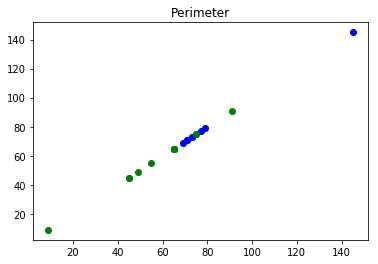

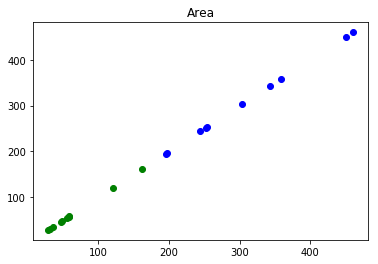

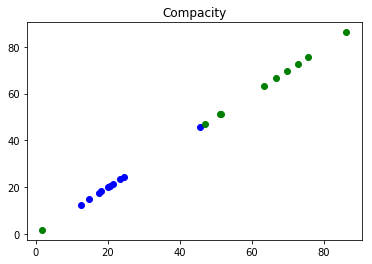

In [116]:
import skimage.morphology as morph
#extract number of images and number of pixels
N_images, N,tmp = zeros_im.shape


#binarize images
thres = 220
zeros_im_bin = zeros_im.copy()
for i in range(0,N_images):
    for j in range(0,N):
        for k in range(0,N):
            if zeros_im_bin[i][j,k] > thres:
                zeros_im_bin[i][j,k] = 255
            else:
                zeros_im_bin[i][j,k] = 0
                
ones_im_bin = ones_im.copy()
for i in range(0,N_images):
    for j in range(0,N):
        for k in range(0,N):
            if ones_im_bin[i][j,k] > thres:
                ones_im_bin[i][j,k] = 255
            else:
                ones_im_bin[i][j,k] = 0
    
#morphology for area computation
full_zeros = []
full_ones = []
area_zeros = []
area_ones = []
area_tmp_zeros = 0
area_tmp_ones = 0
struct_elem = morph.disk(8)
for i in range(0,N_images):
    full_zeros.append(morph.closing(zeros_im_bin[i],struct_elem))
    full_ones.append(morph.closing(ones_im_bin[i],struct_elem))
    
for i in range(0,N_images):
    area_tmp_zeros = 0
    area_tmp_ones = 0
    for j in range(0,N):
        for k in range(0,N):
            if full_zeros[i][j,k] == 255:
                area_tmp_zeros = area_tmp_zeros+1
            if full_ones[i][j,k] == 255:
                area_tmp_ones = area_tmp_ones+1
    area_zeros.append(area_tmp_zeros)
    area_ones.append(area_tmp_ones)
    
#visualize morph
zeros_contour_im = np.zeros((N_images,N,N))
ones_contour_im = np.zeros((N_images,N,N))
for j in range(0,N_images):
    for i in range(0,len(contour_zeros[j][0])):
        zeros_contour_im[j,int(round(contour_zeros[j][0][i,0])),int(round(contour_zeros[j][0][i,1]))] = 255
    for i in range(0,len(contour_ones[j][0])):
        ones_contour_im[j,int(round(contour_ones[j][0][i,0])),int(round(contour_ones[j][0][i,1]))] = 255

fig, ax = plt.subplots(2,N_images, figsize=(12, 3))
for idx in range(0,N_images):
        ax[0,idx].imshow(full_zeros[idx], cmap='gray')
        ax[0,idx].axis('off')
        ax[0,idx].set_title('{}-countour'.format(idx))
        ax[1,idx].imshow(full_ones[idx], cmap='gray')
        ax[1,idx].axis('off')
        ax[1,idx].set_title('{}-countour'.format(idx))
plt.show()

#contour_zeros will be a list of lists of ndarrays with the coordinates of the contour
#access it with contour_zeros[im_idx,arra_idx,]
contour_zeros = []
contour_ones = []
for i in range(0,N_images):
    contour_zeros.append(mes.find_contours(zeros_im_bin[i], 128, fully_connected='high', positive_orientation='low'))
    contour_ones.append(mes.find_contours(ones_im_bin[i], 128, fully_connected='high', positive_orientation='low'))
    

#plot perimeter
for i in range(0,N_images):
    plt.plot(len(contour_zeros[i][0]),len(contour_zeros[i][0]),'bo',len(contour_ones[i][0]),len(contour_ones[i][0]),'go')
plt.title('Perimeter')
plt.show()

#plot area
for i in range(0,N_images):
    plt.plot(area_zeros[i],area_zeros[i],'bo',area_ones[i],area_ones[i],'go')
plt.title('Area')
plt.show()

#plot compacity
for i in range(0,N_images):
    plt.plot(((len(contour_zeros[i][0]))**2) /(area_zeros[i]),((len(contour_zeros[i][0]))**2) /(area_zeros[i]),'bo',((len(contour_ones[i][0]))**2) /(area_ones[i]),((len(contour_ones[i][0]))**2) /(area_ones[i]),'go')
plt.title('Compacity')
plt.show()